In [ ]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
from collections import Counter
import itertools
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx


import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022 (1).csv


In [ ]:
year_df = pd.DataFrame()

In [ ]:
year = 2017

In [ ]:
while year<2023:
    year_df = year_df.append(pd.read_csv(str(year)+".csv"), ignore_index = True) 
    year += 1

In [ ]:
year_df.head()

Unnamed: 0                  id     conversation_id       created_at  \
0         0.0  945814723521417217  945712432416137217  1514334777000.0   
1         1.0  945749747129659392  945712432416137217  1514319285000.0   
2         2.0  945748731197980672  945712432416137217  1514319043000.0   
3         3.0  945730195113365504  945727773493968896  1514314623000.0   
4         4.0  945729852874694656  945712432416137217  1514314542000.0   

                  date  timezone  place  \
0  2017-12-27 00:32:57         0    NaN   
1  2017-12-26 20:14:45         0    NaN   
2  2017-12-26 20:10:43         0    NaN   
3  2017-12-26 18:57:03         0    NaN   
4  2017-12-26 18:55:42         0    NaN   

                                               tweet language hashtags  ...  \
0                @neilsiegel @Tesla Coming very soon       en       []  ...   
1       @Kreative Vastly better maps/nav coming soon       en       []  ...   
2                                       @dd_hogan Ok      und       []  ...   
3                                 @Jason @Tesla Sure       en       []  ...   
4  @kabirakhtar Yeah, it’s terrible. Had to upgra...       en       []  ...   

  translate  trans_src  trans_dest time mentions  replies_count  \
0       NaN        NaN         NaN  NaN      NaN            NaN   
1       NaN        NaN         NaN  NaN      NaN            NaN   
2       NaN        NaN         NaN  NaN      NaN            NaN   
3       NaN        NaN         NaN  NaN      NaN            NaN   
4       NaN        NaN         NaN  NaN      NaN            NaN   

   retweets_count likes_count  \
0             NaN         NaN   
1             NaN         NaN   
2             NaN         NaN   
3             NaN         NaN   
4             NaN         NaN   

                                         clean_tweet  year  
0                  neilsiegel tesla coming very soon  2017  
1         kreative vastly better mapsnav coming soon  2017  
2                                        dd_hogan ok  2017  
3                                   jason tesla sure  2017  
4  kabirakhtar yeah its terrible had to upgrade o...  2017  

[5 rows x 46 columns]

In [ ]:
year_df.dtypes

Unnamed: 0         float64
id                   int64
conversation_id      int64
created_at          object
date                object
timezone             int64
place              float64
tweet               object
language            object
hashtags            object
cashtags            object
user_id              int64
user_id_str        float64
username            object
name                object
day                float64
hour               float64
link                object
urls                object
photos              object
video                int64
thumbnail           object
retweet               bool
nlikes             float64
nreplies           float64
nretweets          float64
quote_url           object
search              object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
t

**Preprocessing Tweets**



In [ ]:
#removing all the special characters
year_df['clean_tweet'] = year_df['tweet'].str.replace('[^\w\s]','') 

In [ ]:
#removing all the numbers
year_df['clean_tweet'] = year_df['clean_tweet'].str.replace('\d+', '') 

In [ ]:
# removing www and http from URLs
year_df['clean_tweet'] = year_df['clean_tweet'].apply(lambda a: re.sub(r'http\S+', '', a)) 
year_df['clean_tweet'] = year_df['clean_tweet'].apply(lambda b: re.sub(r'www?\S+', '', b))

In [ ]:
#converting all tweets to lower case
year_df['clean_tweet'] = year_df['clean_tweet'].str.lower()

In [ ]:
year_df['year'] = year_df['date'].apply(pd.to_datetime).dt.year 

In [ ]:
year_df

Unnamed: 0                   id      conversation_id  \
0             0.0   945814723521417217   945712432416137217   
1             1.0   945749747129659392   945712432416137217   
2             2.0   945748731197980672   945712432416137217   
3             3.0   945730195113365504   945727773493968896   
4             4.0   945729852874694656   945712432416137217   
...           ...                  ...                  ...   
29619         NaN  1477775713172402176  1477775713172402176   
29620         NaN  1477706142461706248  1477706142461706248   
29621         NaN  1477700424933253123  1477700424933253123   
29622         NaN  1477096955658579974  1476958174439567360   
29623         NaN  1477080438049058818  1476768985509212162   

                                      created_at                 date  \
0                                1514334777000.0  2017-12-27 00:32:57   
1                                1514319285000.0  2017-12-26 20:14:45   
2                                1514319043000.0  2017-12-26 20:10:43   
3                                1514314623000.0  2017-12-26 18:57:03   
4                                1514314542000.0  2017-12-26 18:55:42   
...                                          ...                  ...   
29619  2022-01-03 02:56:00 Arabian Standard Time           2022-01-03   
29620  2022-01-02 22:19:33 Arabian Standard Time           2022-01-02   
29621  2022-01-02 21:56:50 Arabian Standard Time           2022-01-02   
29622  2022-01-01 05:58:52 Arabian Standard Time           2022-01-01   
29623  2022-01-01 04:53:13 Arabian Standard Time           2022-01-01   

       timezone  place                                              tweet  \
0             0    NaN                @neilsiegel @Tesla Coming very soon   
1             0    NaN       @Kreative Vastly better maps/nav coming soon   
2             0    NaN                                       @dd_hogan Ok   
3             0    NaN                                 @Jason @Tesla Sure   
4             0    NaN  @kabirakhtar Yeah, it’s terrible. Had to upgra...   
...         ...    ...                                                ...   
29619       400    NaN                            https://t.co/LA9hPzVlGx   
29620       400    NaN                Let’s make the roaring 20’s happen!   
29621       400    NaN                Great work by Tesla team worldwide!   
29622       400    NaN                                  @BLKMDL3 @Tesla 🔥   
29623       400    NaN                  @MiFSDBetaTester @WholeMarsBlog 🤣   

      language hashtags  ... translate  trans_src  trans_dest      time  \
0           en       []  ...       NaN        NaN         NaN       NaN   
1           en       []  ...       NaN        NaN         NaN       NaN   
2          und       []  ...       NaN        NaN         NaN       NaN   
3           en       []  ...       NaN        NaN         NaN       NaN   
4           en       []  ...       NaN        NaN         NaN       NaN   
...        ...      ...  ...       ...        ...         ...       ...   
29619      und       []  ...       NaN        NaN         NaN  02:56:00   
29620       en       []  ...       NaN        NaN         NaN  22:19:33   
29621       en       []  ...       NaN        NaN         NaN  21:56:50   
29622      und       []  ...       NaN        NaN         NaN  05:58:52   
29623      und       []  ...       NaN        NaN         NaN  04:53:13   

      mentions  replies_count  retweets_count likes_count  \
0          NaN            NaN             NaN         NaN   
1          NaN            NaN             NaN         NaN   
2          NaN            NaN             NaN         NaN   
3          NaN            NaN             NaN         NaN   
4          NaN            NaN             NaN         NaN   
...        ...            ...             ...         ...   
29619       []        25611.0         51383.0    473530.0   
29620       []        22500.0         26951.0    320201.0  

In [ ]:
clean_df = year_df[['year','clean_tweet']]

In [ ]:
clean_df = clean_df[(clean_df['year']>=2017) & (clean_df['year']<=2022)]

In [ ]:
clean_df.head

<bound method NDFrame.head of        year                                        clean_tweet
0      2017                  neilsiegel tesla coming very soon
1      2017         kreative vastly better mapsnav coming soon
2      2017                                        dd_hogan ok
3      2017                                   jason tesla sure
4      2017  kabirakhtar yeah its terrible had to upgrade o...
...     ...                                                ...
29619  2022                                                   
29620  2022                     lets make the roaring s happen
29621  2022                 great work by tesla team worldwide
29622  2022                                      blkmdl tesla 
29623  2022                     mifsdbetatester wholemarsblog 

[23606 rows x 2 columns]>

Word frequencies

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#grouping all tweets
clean_df = clean_df.groupby('year', as_index = True)['clean_tweet'].apply(lambda k: ' '.join(k)).reset_index() 

In [ ]:
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda l: word_tokenize(l))

In [ ]:
#removing stop words
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda m: [i for i in m if i not in stop_words]) 

In [ ]:
clean_df

year                                        clean_tweet
0  2017  [neilsiegel, tesla, coming, soon, kreative, va...
1  2018  [ben, vincent, thanks, tesla, owners, china, l...
2  2019  [joe__wakefield, austinbarnard, tjq, tyger_cyb...
3  2020  [entertainment, critical, cars, drive, kimpaqu...
4  2021  [roshanpatei, tesla_raj, many, ui, improvement...
5  2022  [spacepadreisle, way, free, qa, haha, teslaown...

In [ ]:
frequency_df = pd.DataFrame()

In [ ]:
for year in clean_df['year'].unique():
    k = Counter(clean_df[clean_df['year'] == year].iloc[0,1])
    fq = pd.DataFrame(k.items(), columns = ['word','Frequency'])
    fq['year'] = year
    frequency_df = frequency_df.append(fq, ignore_index = True)

In [ ]:
frequency_df

word  Frequency  year
0           neilsiegel          3  2017
1                tesla        234  2017
2               coming         78  2017
3                 soon         96  2017
4             kreative          3  2017
...                ...        ...   ...
31930              age          2  2022
31931             lets          2  2022
31932          roaring          2  2022
31933           happen          2  2022
31934  mifsdbetatester          2  2022

[31935 rows x 3 columns]

**Top Ten repeated words**

In [ ]:
#Printing the top ten frquently repeated words
for k in frequency_df['year'].unique():
  print("\n")
  print(frequency_df[frequency_df['year'] == k].sort_values(by = 'Frequency', ascending = False).head(10).reset_index().drop('index', axis = 1))



     word  Frequency  year
0     amp        258  2017
1   tesla        234  2017
2   model        177  2017
3     yes        162  2017
4    good        159  2017
5  spacex        153  2017
6    like        147  2017
7     one        138  2017
8   first        129  2017
9    next        129  2017


     word  Frequency  year
0     amp       1575  2018
1   tesla       1345  2018
2     car        357  2018
3     yes        321  2018
4    good        308  2018
5   model        294  2018
6    like        282  2018
7  spacex        264  2018
8   would        228  2018
9    dont        222  2018


             word  Frequency  year
0           tesla       1130  2019
1             amp        961  2019
2  erdayastronaut        520  2019
3          spacex        427  2019
4         flcnhvy        364  2019
5             yes        307  2019
6           would        194  2019
7           great        193  2019
8   teslaownerssv        182  2019
9        starship        177  2019


             

# HISTOGRAM PLOTS OF WORD FREQUENCY FOR EACH YEAR

[Text(0.5, 1.0, 'Year 2017')]

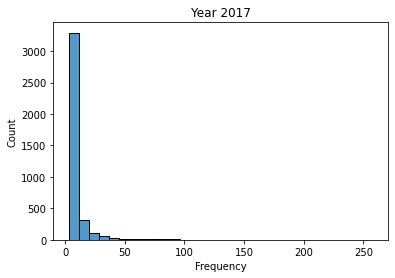

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2017], x="Frequency", bins = 30).set(title='Year 2017')

[Text(0.5, 1.0, 'Year 2018')]

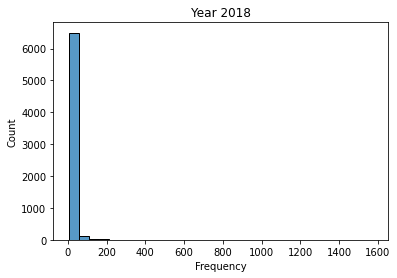

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2018], x="Frequency", bins = 30).set(title='Year 2018')

[Text(0.5, 1.0, 'Year 2019')]

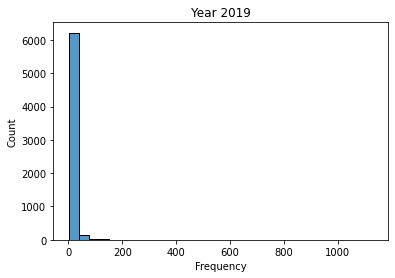

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2019], x="Frequency", bins = 30).set(title='Year 2019')

[Text(0.5, 1.0, 'Year 2020')]

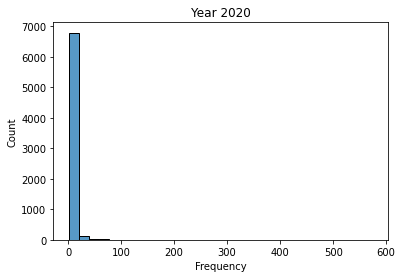

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2020], x="Frequency", bins = 30).set(title='Year 2020')

[Text(0.5, 1.0, 'Year 2021')]

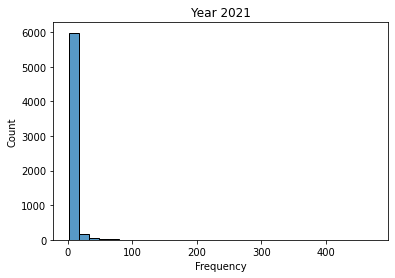

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2021], x="Frequency", bins = 30).set(title='Year 2021')

[Text(0.5, 1.0, 'Year 2022')]

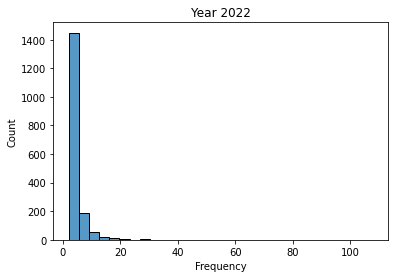

In [ ]:
sns.histplot(data=frequency_df[frequency_df['year'] == 2022], x="Frequency", bins = 30).set(title='Year 2022')

# **log-log plots for word Frequency and Rank for each year**

Text(0.5, 1.0, 'Year 2017')

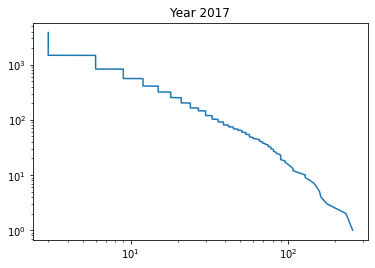

In [ ]:
df_17 = frequency_df[frequency_df['year'] == 2017].sort_values(by = 'Frequency', ascending = False)
df_17['rank'] = range(1,len(df_17)+1)
plt.loglog(df_17['Frequency'], df_17['rank'])
plt.title('Year 2017')


In [ ]:
df_17

word  Frequency  year  rank
129         amp        258  2017     1
1         tesla        234  2017     2
65        model        177  2017     3
176         yes        162  2017     4
75         good        159  2017     5
...         ...        ...   ...   ...
1877     videos          3  2017  3850
1881  inspiring          3  2017  3851
1882   creative          3  2017  3852
1885    loveday          3  2017  3853
3853     firing          3  2017  3854

[3854 rows x 4 columns]

In [ ]:
df_fre_17=df_17.iloc[:,0:2]
df_fre_17

word  Frequency
129         amp        258
1         tesla        234
65        model        177
176         yes        162
75         good        159
...         ...        ...
1877     videos          3
1881  inspiring          3
1882   creative          3
1885    loveday          3
3853     firing          3

[3854 rows x 2 columns]

Biagrams for year 17

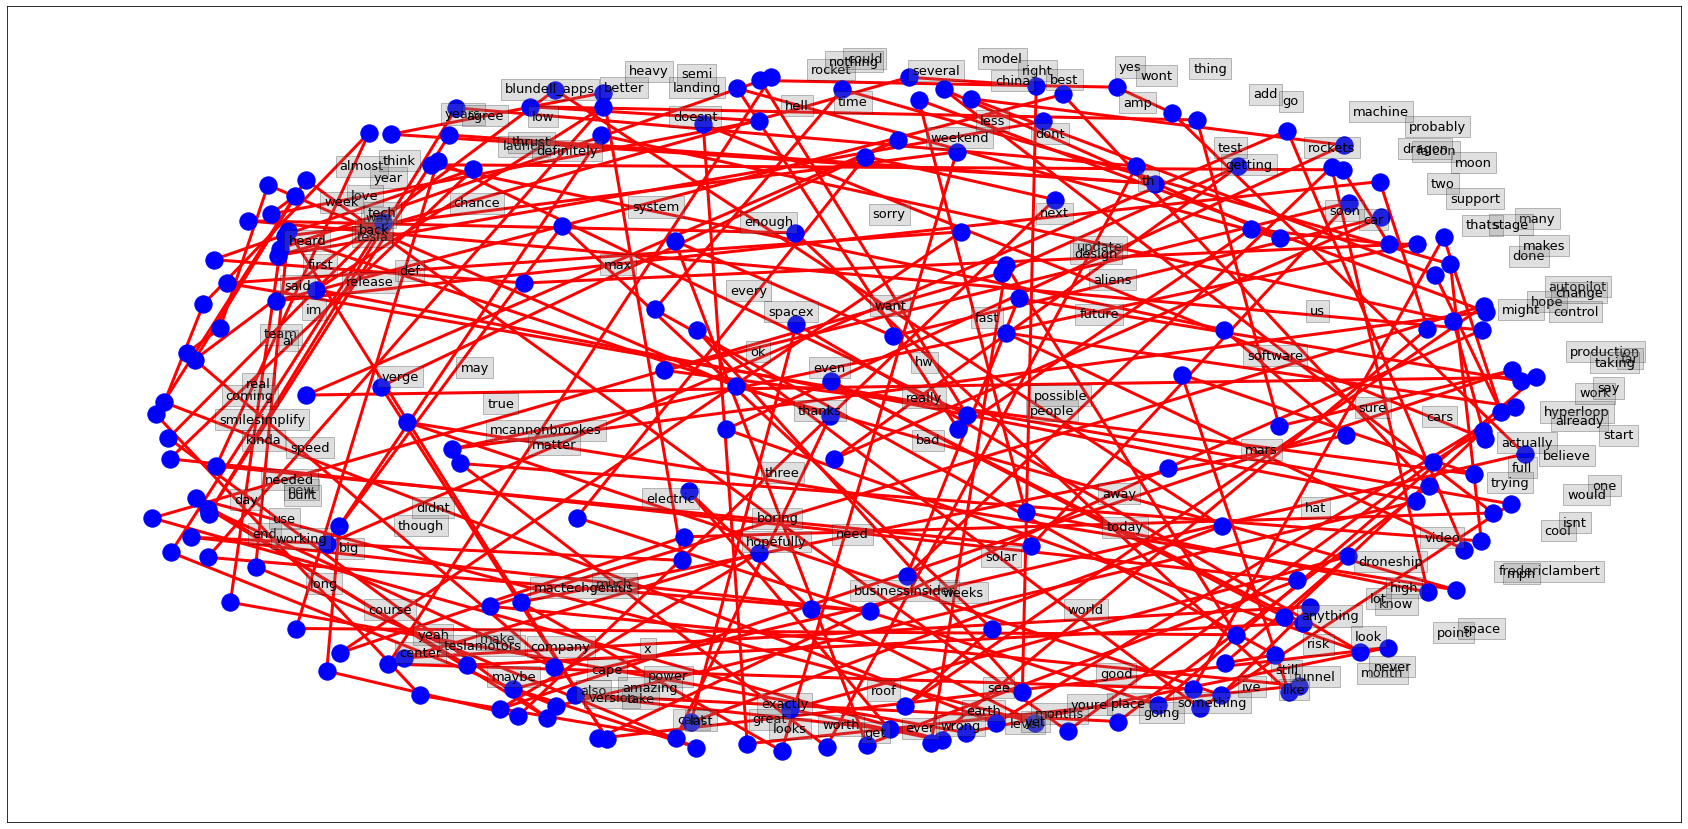

In [ ]:
#create bigrams

df_fre_17=df_17.iloc[:,0:2]
freq_list_17=df_fre_17["word"].tolist()

from nltk.util import bigrams
#x=list(bigrams(freq_list))
bigrams =list(nltk.bigrams(freq_list_17))

bigra_dist =nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


#BIGRAM
# Creating  dictionary of bigrams with their counts
dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

# Create network plot 
Nep = nx.Graph()

# Create connections between nodes
for k, v in dic[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)

# Plot networks
nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


Text(0.5, 1.0, 'Year 2018')

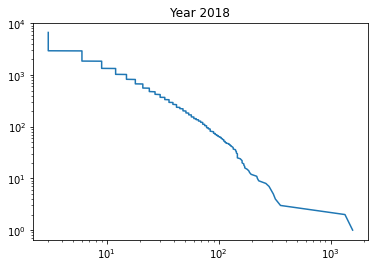

In [ ]:
df_18 = frequency_df[frequency_df['year'] == 2018].sort_values(by = 'Frequency', ascending = False)
df_18['rank'] = range(1,len(df_18)+1)
plt.loglog(df_18['Frequency'], df_18['rank'])
plt.title('Year 2018')

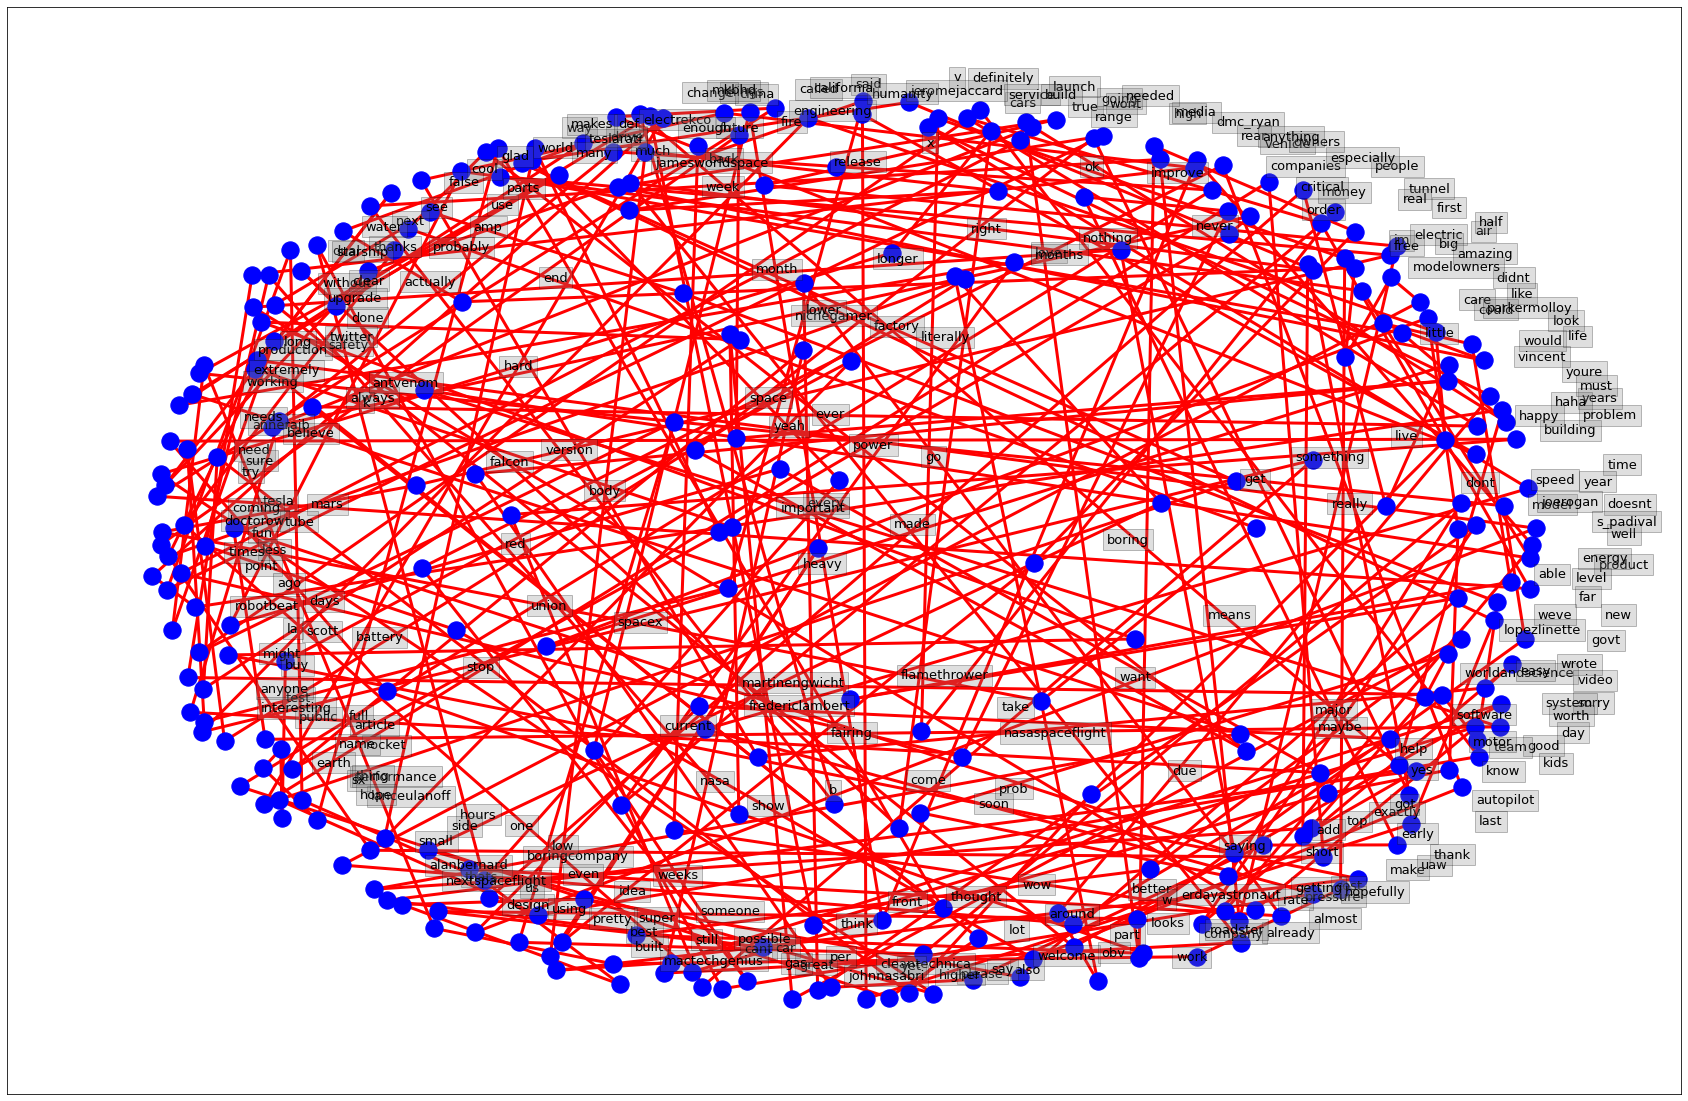

In [ ]:
df_fre_18=df_18.iloc[:,0:2]
freq_list_18=df_fre_18["word"].tolist()

from nltk.util import bigrams
bigrams=list(nltk.bigrams(freq_list_18))

bigra_dist=nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(300),columns=['Bigrams','Frequency'])

dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

Nep = nx.Graph()

for k, v in dic[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)


nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


Text(0.5, 1.0, 'Year 2019')

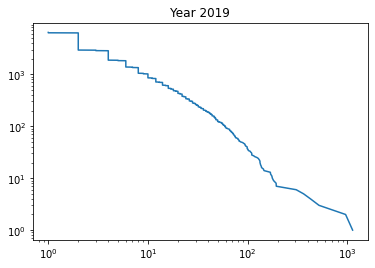

In [ ]:
df_19 = frequency_df[frequency_df['year'] == 2019].sort_values(by = 'Frequency', ascending = False)
df_19['rank'] = range(1,len(df_19)+1)
plt.loglog(df_19['Frequency'], df_19['rank'])
plt.title('Year 2019')

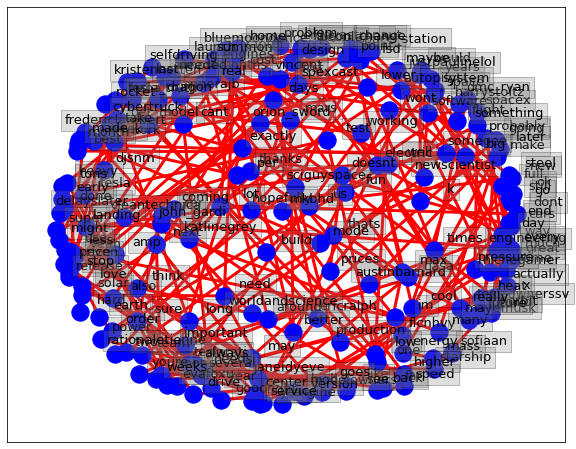

In [ ]:

df_fre_19=df_19.iloc[:,0:2]
freq_list_19=df_fre_19["word"].tolist()

from nltk.util import bigrams
bigrams=list(nltk.bigrams(freq_list_19))

bigra_dist=nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])

d = df_bigrams.set_index('Bigrams').T.to_dict('records')

Nep = nx.Graph()

for k, v in d[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)

nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


Text(0.5, 1.0, 'Year 2020')

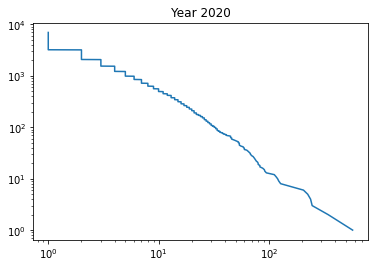

In [ ]:
df_20 = frequency_df[frequency_df['year'] == 2020].sort_values(by = 'Frequency', ascending = False)
df_20['rank'] = range(1,len(df_20)+1)
plt.loglog(df_20['Frequency'], df_20['rank'])
plt.title('Year 2020')

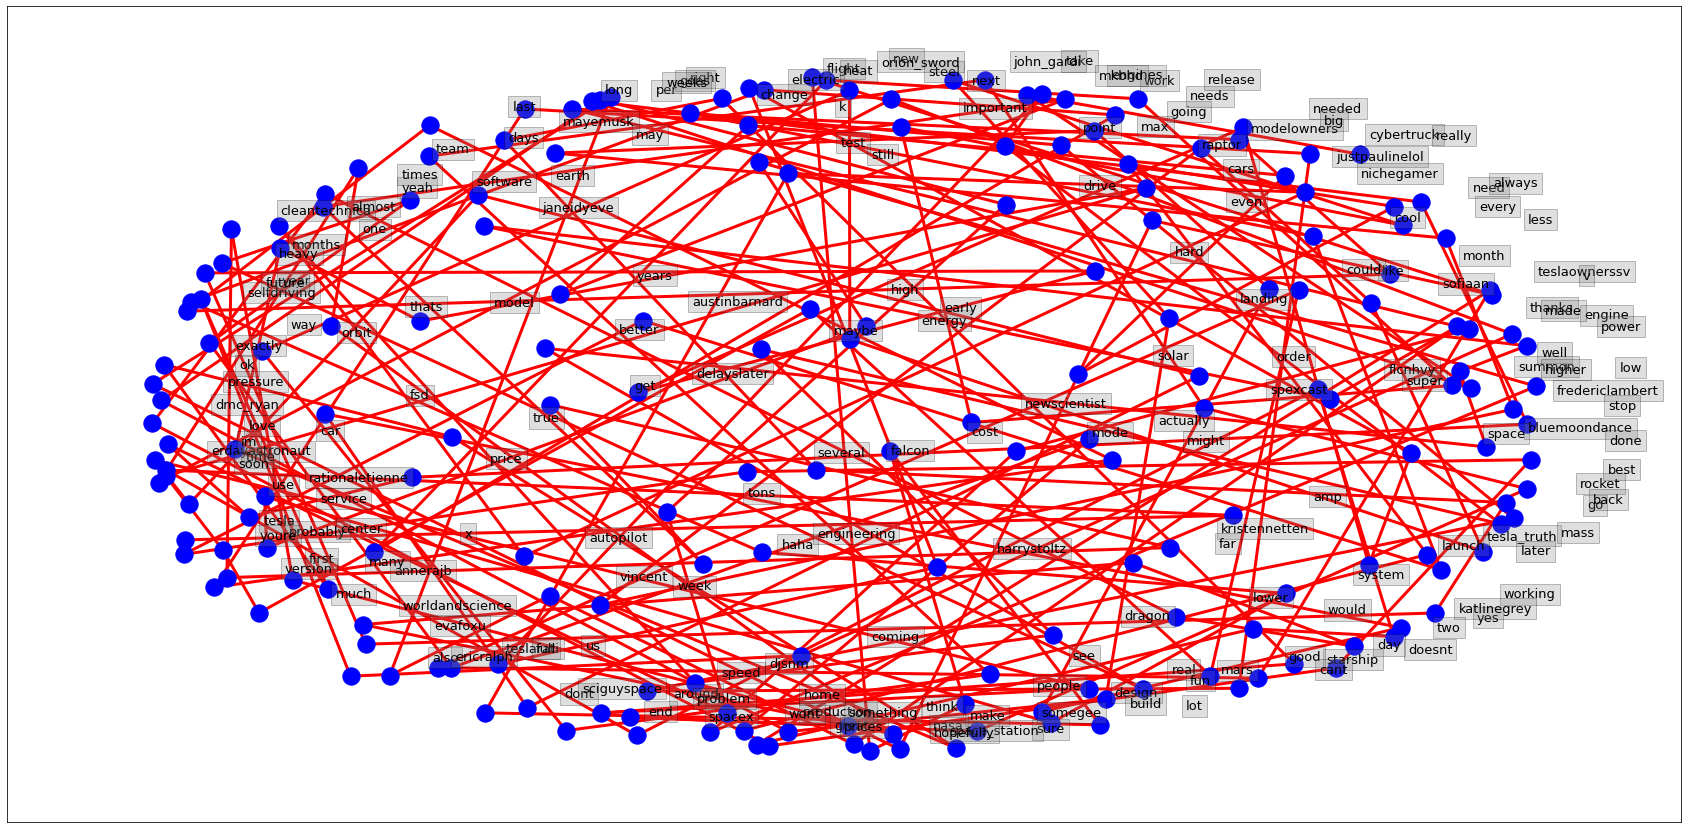

In [ ]:
df_fre_20=df_20.iloc[:,0:2]
freq_list_20=df_fre_20["word"].tolist()

from nltk.util import bigrams
bigrams=list(nltk.bigrams(freq_list_20))

bigra_dist=nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])


dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

Nep = nx.Graph()

for k, v in d[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)

nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


Text(0.5, 1.0, 'Year 2021')

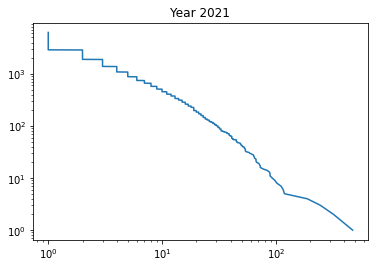

In [ ]:
df_21 = frequency_df[frequency_df['year'] == 2021].sort_values(by = 'Frequency', ascending = False)
df_21['rank'] = range(1,len(df_21)+1)
plt.loglog(df_21['Frequency'], df_21['rank'])
plt.title('Year 2021')

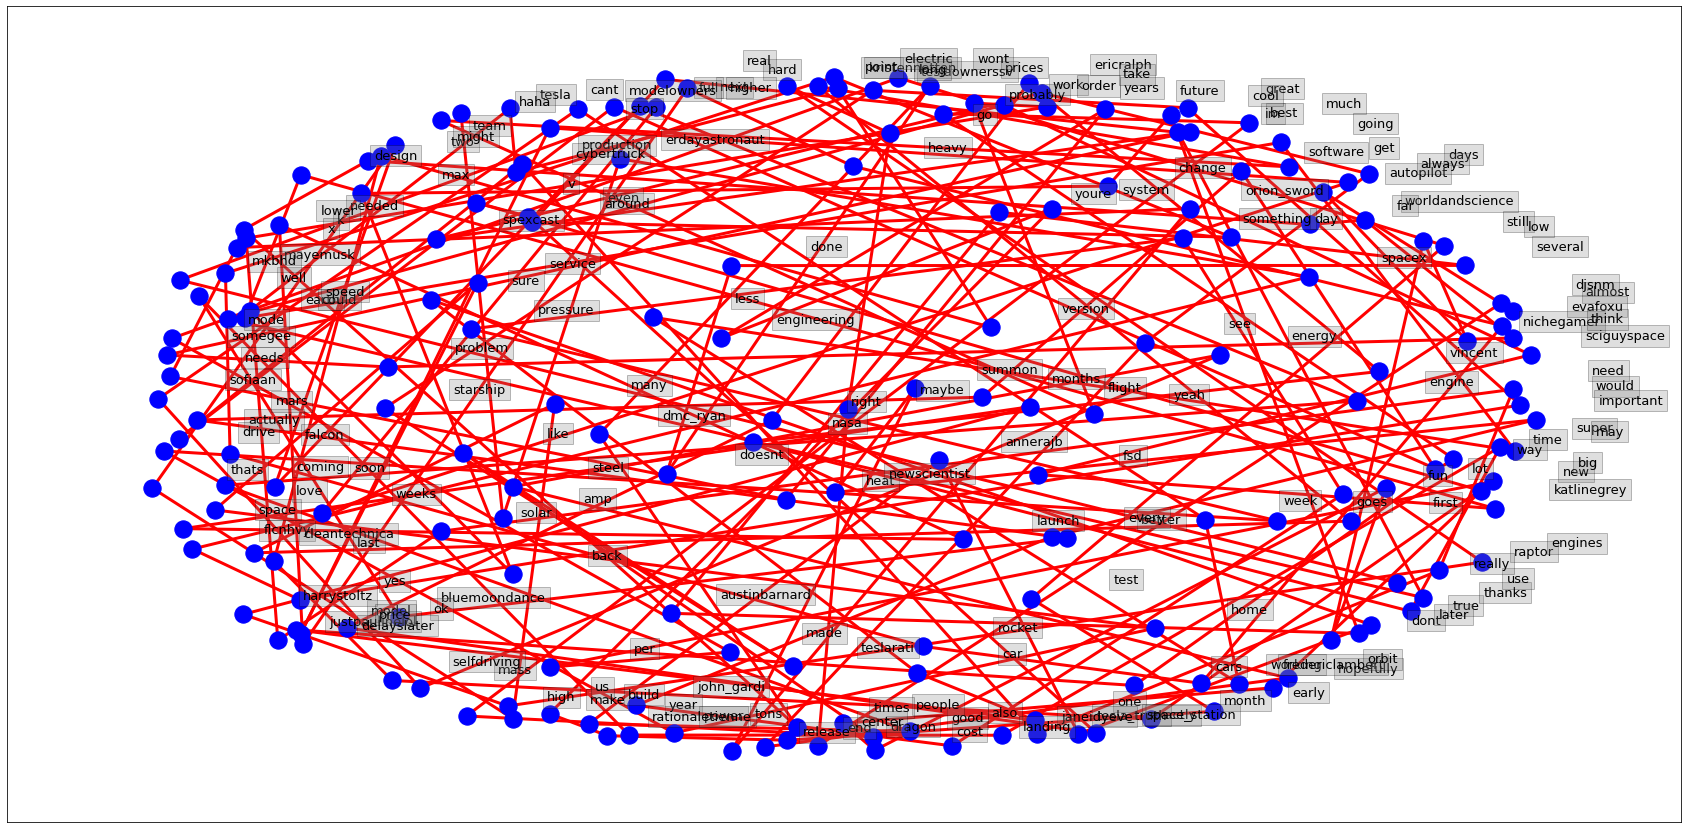

In [ ]:

df_fre_21=df_21.iloc[:,0:2]
freq_list_21=df_fre_21["word"].tolist()

from nltk.util import bigrams
bigrams=list(nltk.bigrams(freq_list_21))

bigra_dist=nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])

dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

Nep = nx.Graph()

for k, v in d[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)

nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()


Text(0.5, 1.0, 'Year 2022')

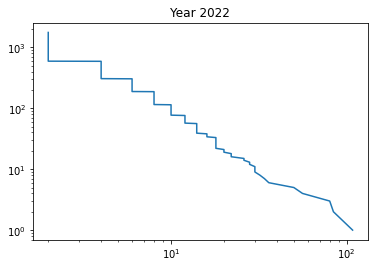

In [ ]:
df_22 = frequency_df[frequency_df['year'] == 2022].sort_values(by = 'Frequency', ascending = False)
df_22['rank'] = range(1,len(df_22)+1)
plt.loglog(df_22['Frequency'], df_22['rank'])
plt.title('Year 2022')

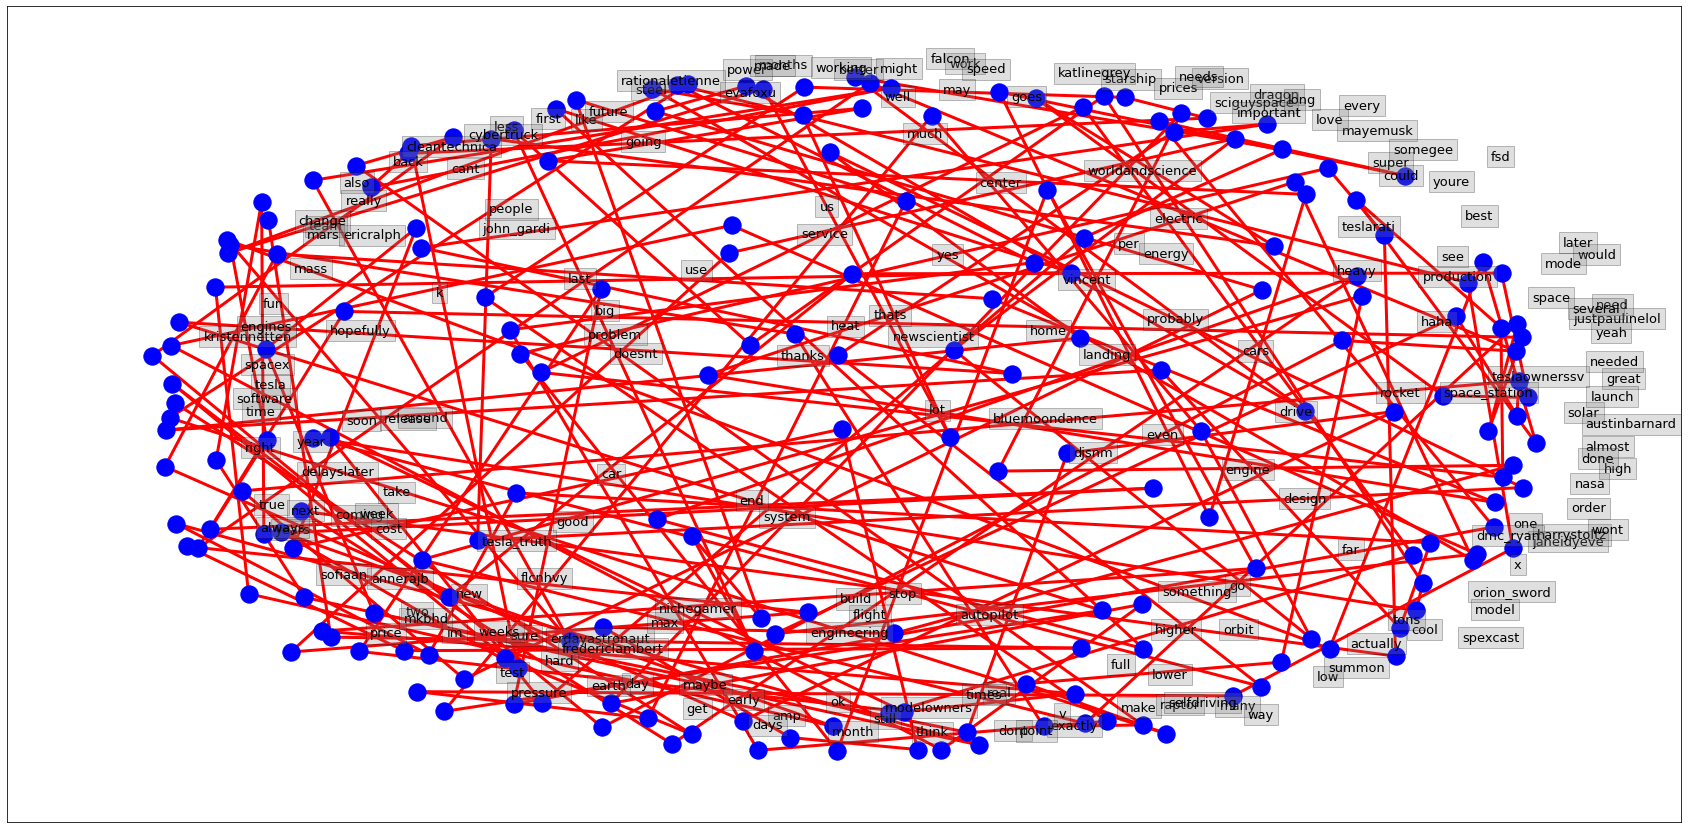

In [ ]:

df_fre_22=df_22.iloc[:,0:2]
freq_list_22=df_fre_22["word"].tolist()

from nltk.util import bigrams
bigrams=list(nltk.bigrams(freq_list_22))

bigra_dist=nltk.FreqDist(bigrams)
df_bigrams=pd.DataFrame(bigra_dist.most_common(200),columns=['Bigrams','Frequency'])

dic = df_bigrams.set_index('Bigrams').T.to_dict('records')

Nep = nx.Graph()

for k, v in d[0].items():
    Nep.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(Nep, k=2)

nx.draw_networkx(Nep, pos,
                 font_size=16,
                 width=3,
                 edge_color='red',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()
